# Problem Set 3

We will need some packages that were not part of your installation instructions. Please run the following two cells.

In [1]:
import Pkg; 
Pkg.add("LinearAlgebra")
Pkg.add("DelimitedFiles")
Pkg.add("Ipopt")
Pkg.add("Plots")

    Updating registry at `C:\Users\joyse\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `C:\Users\joyse\.julia\environments\v1.10\Project.toml`
  [37e2e46d] + LinearAlgebra
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\joyse\.julia\environments\v1.10\Project.toml`
  [8bb1440f] + DelimitedFiles v1.9.1
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Manifest.toml`


In [2]:
using CSV, DataFrames, DelimitedFiles, LinearAlgebra, JuMP, Cbc, Ipopt, Plots

# Problem 3: Portfolio Optimization

## Part A

Make sure the `yearSummary.csv` file is in the same directory as this Jupyter notebook.
We will now import data from it.

<div class="alert alert-block alert-info">
You will need the returns and sigmas vectors later in your LP formulations.
</div>

In [3]:
C = CSV.read("yearSummary.csv", DataFrame, header=false)

keys = C[:,1]
returns = C[:,2]
sigmas = C[:,3]
n = length(keys)
C

Row,Column1,Column2,Column3
,String7,Float64,Float64
1,AAPL,0.189783,0.1968
2,ADBE,0.141126,0.1462
3,AMZN,0.253558,0.216975
4,CSCO,0.0537934,0.0672724
5,MSFT,0.112566,0.0914545


### (a)
We have provided some skeleton code for the optimization problems you are asked to implement for this problem. In particular, we have already defined your variables $x_1,\dots,x_n$ as in the problem set.

<div class="alert alert-block alert-info">
You will need to implement the objective and constraints.
</div>

Note: the LinearAlgebra package defines the `dot` function for the dot product between two arrays (i.e., "vectors"): `dot(x,y)` is the same as `sum(x .* y)`.
Alternatively, you can write `x \cdot y` as a synonym for `dot(x,y)`, where you must tab-complete the `\cdot` to turn it into a $\cdot$ as in LaTeX.
While you may find the `dot` function useful in your own implementation, it is certainly not necessary for a properly functioning implementation, so do not worry if you wind up not using it.

In [7]:
m = Model(Ipopt.Optimizer)
set_silent(m)

@variables m begin
    0 <= x[1:n] <= 1
end

# IMPLEMENT OBJECTIVE HERE
@objective(m, Max, x[1]*0.189783+x[2]*0.141126+x[3]*0.253558+x[4]*0.0537934+x[5]*0.112566) 

@constraints m begin
    x[1]+x[2]+x[3]+x[4]+x[5] ==1
    x[1] >= 0
    x[1] <= 1
    x[2] >= 0
    x[2] <= 1
    x[3] >= 0
    x[3] <= 1
    x[4] >= 0
    x[4] <= 1
    x[5] >= 0
    x[5] <= 1
end

optimize!(m)
L = value.(x)
r1 = objective_value(m)

println("Portfolio: ", L)
println("Expected Return: ", r1)
println("Variance: ", sigmas' * L.^2)

Portfolio: [1.2900304272126526e-7, 4.870298633572541e-8, 0.9999997682453565, 1.958257170148577e-8, 3.446604260648375e-8]
Expected Return: 0.2535579775257159
Variance: 0.21697462243021626


### (b)

In [9]:
m = Model(Ipopt.Optimizer)
set_silent(m)

@variables m begin
    0 <= x[1:n] <= 1
end

@objective(m, Min, 0.1968*(x[1]^2)+0.1462*(x[2]^2)+0.216975*(x[3]^2)+0.0672724*(x[4]^2)+0.0914545*(x[5]^2)) 

@constraints m begin
    x[1]+x[2]+x[3]+x[4]+x[5] ==1
    x[1] >= 0
    x[1] <= 1
    x[2] >= 0
    x[2] <= 1
    x[3] >= 0
    x[3] <= 1
    x[4] >= 0
    x[4] <= 1
    x[5] >= 0
    x[5] <= 1
end

optimize!(m)
L = value.(x)
r1 = objective_value(m)

println("Portfolio: ", L)
println("Expected Return: ", r1)
println("Variance: ", sigmas' * L.^2)

Portfolio: [0.12004195365614165, 0.16158847586592284, 0.10888022804174306, 0.35117260880519596, 0.25831673363099655]
Expected Return: 0.023624237648872146
Variance: 0.023624249641997185


### (d)

In [13]:
vec = 0.02:0.02:0.25

retList = []
varList = []
for k in 1:12
    m = Model(Ipopt.Optimizer)
    set_silent(m)

    @variables m begin
        0 <= x[1:n] <= 1
    end
    
    @objective(m, Min, 0.1968*(x[1]^2)+0.1462*(x[2]^2)+0.216975*(x[3]^2)+0.0672724*(x[4]^2)+0.0914545*(x[5]^2)) 
    
    @constraints m begin
        x[1]*0.189783+x[2]*0.141126+x[3]*0.253558+x[4]*0.0537934+x[5]*0.112566 >= vec[k]
        x[1]+x[2]+x[3]+x[4]+x[5] ==1
        x[1] >= 0
        x[1] <= 1
        x[2] >= 0
        x[2] <= 1
        x[3] >= 0
        x[3] <= 1
        x[4] >= 0
        x[4] <= 1
        x[5] >= 0
        x[5] <= 1
    end

    optimize!(m)

    weights = value.(x)
    variance = objective_value(m)
    r = dot(weights, returns)

    print("K: ", k, "Returns: ", r, ", Variance: ", variance, "\n")
    push!(retList, r)
    push!(varList, variance)
end

K: 1Returns: 0.12116224251633813, Variance: 0.02362423764888437
K: 2Returns: 0.12116224796515153, Variance: 0.023624237648889684
K: 3Returns: 0.12116218381742563, Variance: 0.023624237648855413
K: 4Returns: 0.12116218445212851, Variance: 0.023624237648855465
K: 5Returns: 0.12116220340591571, Variance: 0.0236242376488593
K: 6Returns: 0.12116225180042008, Variance: 0.023624237648887346
K: 7Returns: 0.14000009503710187, Variance: 0.025643818849192
K: 8Returns: 0.16000011232344613, Variance: 0.032208594657487634
K: 9Returns: 0.1800001357612328, Variance: 0.04332625486100547
K: 10Returns: 0.2000001495673781, Variance: 0.061443191663862896
K: 11Returns: 0.22000019632059106, Variance: 0.09093590225180183
K: 12Returns: 0.24000036762519295, Variance: 0.143421619291692


### Graphical Representation

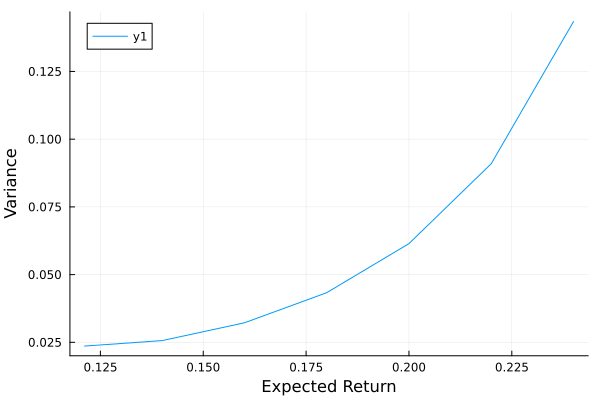

In [14]:
plot(retList, varList)
xlabel!("Expected Return")
ylabel!("Variance")

## Part B
Now that we have introduced correlation between the stocks, we will import the covariance matrix.

The `readdlm` function works similarly to `CSV.read`, except instead of reading in a csv file as a DataFrame type, we now read it in as a matrix type.
This allows us to do matrix math, such as matrix multiplication, on this covariance data, which you may find useful.

The `Symmetric` function casts our covariance matrix as a symmetric matrix (think of it as if we're telling Julia that our matrix is symmetric); this allows some computations to be optimized for speed, using the assumption that the matrix is symmetric.
For such a small matrix, this won't make a big difference, but it's a neat example of the functionality that Julia provides.

In [ ]:
Q = Symmetric(readdlm("covariance.csv", ',', Float64, '\r'))
Q

### (a)
Note: the `dot` function has overloaded functionality that you may find useful: `dot(x,A,y)` returns the dot product between `x` and `A*y`, where `*` denotes matrix multiplication, for vector `x`, matrix `A`, and vector `y`.
Again, the `dot` function is not necessary for a functioning implementation, but you may find it helpful.

In [ ]:
m = Model(Ipopt.Optimizer)
set_silent(m)

@variables m begin
    0 <= x[1:n] <= 1
end

# IMPLEMENT OBJECTIVE HERE

@constraints m begin
    # IMPLEMENT CONSTRAINTS HERE
end

optimize!(m)
L = value.(x)
V = objective_value(m)

print("Variance: ", V)

### (b)

In [ ]:
vec = 0.02:0.02:0.25

retList = []
varList = []
for k in 1:12
    m = Model(Ipopt.Optimizer)
    set_silent(m)

    @variables m begin
        0 <= x[1:n] <= 1
    end
    
    # IMPLEMENT OBJECTIVE HERE
    
    @constraints m begin
        # IMPLEMENT CONSTRAINTS HERE
    end

    optimize!(m)

    weights = value.(x)
    variance = objective_value(m)
    r = dot(weights, returns)

    print("K: ", k, ", Returns: ", r, ", Variance: ", variance, "\n")
    push!(retList, r)
    push!(varList, variance)
end

#### Graphical Representation

In [ ]:
plot(retList, varList)
xlabel!("Expected Return")
ylabel!("Variance")

 # (d)
 
Note: for anybody unfamiliar with the concept of the Sharpe ratio, it's a widely used metric in finance to evaluate a portfolio.

In general, as we've seen in the previous parts, the optimization problem of portfolio management fundamentally has two objectives: maximize (expected) returns and minimize risk, i.e., volatility, which we measure through the variance.
These two objectives compete with each other, so the Sharpe ratio is a good heuristic on how to make this tradeoff between expected value and risk.
We see that high expected returns and low variance both increase the Sharpe ratio.

For statistically-minded individuals, one can view the Sharpe ratio as a t-statistic: in some sense, it says how "statistically significant" your portfolio is at being profitable, and it also allows portfolio managers to review how "lucky" they were with their past portfolios.

<div class="alert alert-block alert-info">
As the Sharpe ratio is a ratio between expected returns and variance, it is not a linear function in our variables. As a result, you will need to tell JuMP that your objective is not linear, by using the more general NLobjective method.
</div>

In [ ]:
m = Model(Ipopt.Optimizer)
set_silent(m)

@variables m begin
    0 <= x[1:n] <= 1
end

# IMPLEMENT OBJECTIVE HERE: USE @NLobjective INSTEAD OF @objective, AS THE SHARPE RATIO IS NOT A LINEAR FUNCTION

@constraints m begin
    # IMPLEMENT CONSTRAINTS HERE
end

optimize!(m)
L = value.(x)
SR = objective_value(m)

println("Portfolio: ", L)
println("Expected Return: ", dot(L, returns))
println("Sharpe Ratio: ", SR)